<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/1_Caracterizaci%C3%B3n_Variables_Aleatorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Caracterización Experimental de Variables**

##0. Cargamos Librerias de Trabajo

In [ ]:
import numpy as np #Funciones Númericas
import matplotlib.pyplot as plt
import pandas as pd #Comunicación con el Excel
import seaborn as sns #Libreria para la gráfica de distribuciones

#Para carga automática de los datos
from google.colab import drive #Cargar datos desde Drive automáticamente
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Cargamos la Base de Datos

In [ ]:
nxl = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/3. FallasTecnologicas.xlsx'
XDB = pd.read_excel(nxl, sheet_name=0)

#Mostramos los primeros 100 datos
XDB.head(100)

,Fechas,Eventos,Transaccion Promedio,Eventos-Fallo,Pérdida Promedio
0,Semana 1,80,14.8058,1,0.5374
1,Semana 2,105,56.4721,4,1.1978
2,Semana 3,70,9.9760,5,0.4269
3,Semana 4,105,18.2949,6,1.0814
4,Semana 5,130,23.4112,7,1.2105
...,...,...,...,...,...
95,Semana 96,115,25.2722,1,1.3816
96,Semana 97,75,8.8613,6,1.2785
97,Semana 98,85,19.7139,1,0.6788
98,Semana 99,80,1.4179,3,14.7925


In [ ]:
#Tomamos las variables de interés
Xev = XDB.iloc[:,3] #Variable Eventos Semanales
Xsev = XDB.iloc[:,4] #Pérdidas Promedio por Evento

LDA= np.multiply(Xev,Xsev) #Multiplicamos las variables

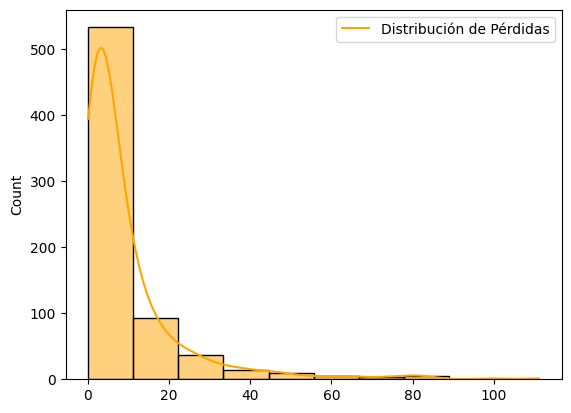

In [ ]:
#Gráficamos la distribución de las Pérdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10, color= 'orange') #Bins agrupar los datos en 10 intervalos
plt.legend(['Distribución de Pérdidas'])
plt.show()

##2. Caracterización de la Distribución de las Pérdidas

In [ ]:
counts,bins_edges=np.histogram(LDA,bins=10)
print("Los datos por intervalo son:\n", counts)     #Cuantos datos hay por intervalo
print("Los limites de los intervalos son: \n", bins_edges) #Limites de los Intervalos

Los datos por intervalo son:
 [533  93  37  14   9   5   3   5   1   1]
Los limites de los intervalos son: 
 [  0.1423   11.23637  22.33044  33.42451  44.51858  55.61265  66.70672
  77.80079  88.89486  99.98893 111.083  ]


In [ ]:
#1. Los valores centrales - marca de clase
mc= (bins_edges[:-1]+bins_edges[1:])/2
#Limites Inferiores bins_edges[:-1]
#Limites Superiores bins_edges[1:]
print("Los valores centrales de las clases son: \n", mc)

Los valores centrales de las clases son: 
 [  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]


In [ ]:
#Cuantos datos hay por Intervalo
fp = counts/sum(counts)
print("Los datos por intervalos son:\n", fp)

Los datos por intervalos son:
 [0.76034237 0.13266762 0.05278174 0.01997147 0.0128388  0.00713267
 0.0042796  0.00713267 0.00142653 0.00142653]


In [ ]:
#2. Se procede con el cálculo de las medidas de Tendencia Central (Media, Varianza, Coeficiente de Asimetría, Kortosis)

#2.1.Media
u = np.sum(np.multiply(mc, fp))
print("La media de los datos es: ", u)

#2.2. Desviación Estándar - Varianza
#Varianza
var = np.sum(np.multiply((mc-u)**2,fp)) #Suma producto del Excel
print("La varianza de los datos es: ", var)
#Desviación Estándar
std = np.sqrt(var)
print("La desviación estándar de los datos es: ", std)

#2.3.Coeficiente de Asimetría
cas= np.sum(np.multiply((mc-u)**3,fp))/((std**3)*np.sum(fp))
print("El coeficiente de asimetría de los datos es: ", cas)

#2.4. Kurtosis
kur= np.sum(np.multiply((mc-u)**4,fp))/((std**4)*np.sum(fp))
kur= kur-3
print("La kurtosis de los datos es: ", kur)

La media de los datos es:  11.07019634094151
La varianza de los datos es:  170.14888945066892
La desviación estándar de los datos es:  13.044113210589247
El coeficiente de asimetría de los datos es:  3.5824155186772604
La kurtosis de los datos es:  15.266617247076205


##**3. Análisis de Resultados**

En la base de datos se cuenta con un total de 701 registros de eventos de pérdida, asociados con la las operaciones a través de canles electrónicos de una FINTECH. Estos registros nos arrojan como resultado una confiabilidad en la estimación de los estadísticos del 99%, de acuerdo con la teoría de los percentiles. En la gráfica anterior podemos observar que la distribución presenta estructura de cola larga, esto promovido por un coeficiente de asimetría positivo aproximadamente de 3.348, y un coeficiente de curtosis aproximadamente de cerca de 15 unidades, lo que indica que la mayoria de los datos se encuentran muy concentrados alrededor de la media, en un 76% aproximadamente. Esta estructura muestra claramente que los eventos de pérdida extremos son muy escasos, lo que indica una baja exposición al riesgo.

##4. Se procede con el muestreo de la variable aleatoria de pérdidas

In [ ]:
#Importamos Librerias Adicionales
from scipy.stats import skew #Coeficiente de Asimetría
from scipy.stats import kurtosis #Kurtosis

In [ ]:
#0. Preparamos la variable para el muestreo
LDAdf= pd.DataFrame(LDA)

#1. Se procede con el muestreo - se va a repetir número de los 349
LDAs= LDAdf.sample(n=1000, replace=True)

#Calculamos el coeficiente de asimetría
casd=skew(LDAs)
print("El coeficiente de asimetría de los datos es: ", casd)

#Calculamos el coeficiente de curtosis
kurd=kurtosis(LDAs)
print("La kurtosis de los datos es: ", kurd)

El coeficiente de asimetría de los datos es:  [3.33869368]
La kurtosis de los datos es:  [14.55724145]


In [ ]:
#Variación Coeficiente de Asimetría
pvcas = (cas-casd)/cas
print("La variación del coeficiente de asimetría es: ", pvcas)

#Variación Coeficiente de Curtosis
pvkurt = (kur-kurd)/kur
print("La variación del coeficiente de curtosis es: ", pvkurt)

La variación del coeficiente de asimetría es:  [0.06803282]
La variación del coeficiente de curtosis es:  [0.04646581]


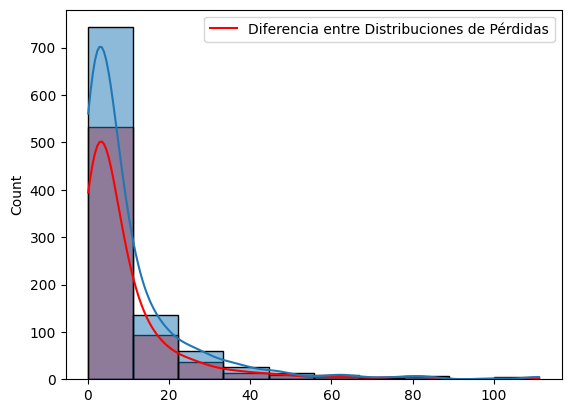

In [ ]:
#Se procede con la gráfica de las distribuciones de las pérdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10, color= 'red')
sns.histplot(LDAs, kde=True, bins=10, color= 'green')
plt.legend(['Diferencia entre Distribuciones de Pérdidas'])
plt.show()

##5. Mapeo de la Distribución de Probabilidad

In [ ]:
if abs(cas)<0.5 and abs(kur)<0.5:
  print("Posible distribución Normal")

elif cas>0 and kur>3:
  if kur>=8:
    print("Posible distribución Exponencial")
  elif kur>=6:
    print("Posible distribución Gamma")
  else:
    print("Posible distribución Weibull")
elif cas<0 and kur<3:
  print("Posible distribución Beta")
elif kur<3:
  print("Posible distribución Uniforme")
else:
  print("No se puede determinar la distribución")

Posible distribución Exponencial


##**6. Análisis de Resultados**

El número de datos disponibles para este análisis fueron un total de 701 datos lo que lo ubica en una confiabilidad del 99%. Para incrementar esta confiabilidad se procedio con un muestreo basado en el método de montecarlo (Giro de la Ruleta - Cargada), logrando en muchos casos coeficientes de asimetría y coeficientes de curtosis por debajo del 5% y 15% respectivamante. A diferencia del método sampling que utiliza la librería pandas los cuales tuvieron variaciones mayores a estos porcentajes. El método de montecarlo asegura variaciones mucho más bajas en estos coeficientes.